In [2]:
# import library
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


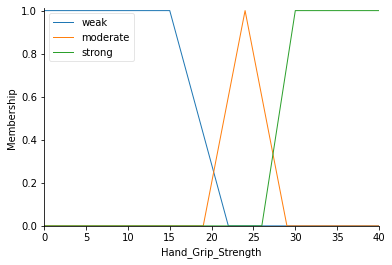

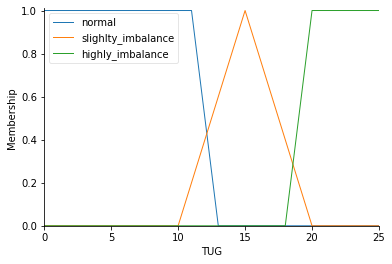

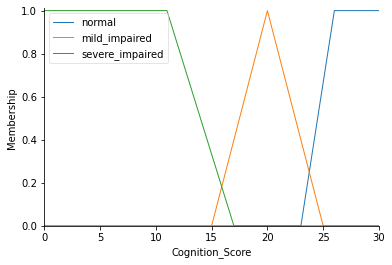

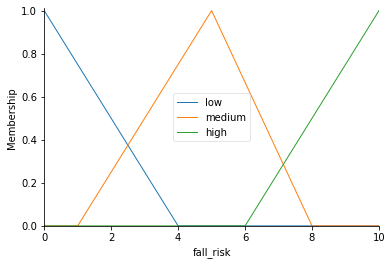

In [3]:
# Define the membership functions for the fuzzy variables
strength = ctrl.Antecedent(np.arange(0, 41, 1), 'Hand_Grip_Strength')
strength['weak'] = fuzz.trapmf(strength.universe, [0, 0, 15, 22])
strength['moderate'] = fuzz.trimf(strength.universe, [19, 24, 29])
strength['strong'] = fuzz.trapmf(strength.universe, [26, 30, 40, 40])

gait = ctrl.Antecedent(np.arange(0, 26, 1), 'TUG')
gait['normal'] = fuzz.trapmf(gait.universe, [0, 0, 11, 13])
gait['slighlty_imbalance'] = fuzz.trimf(gait.universe, [10, 15, 20])
gait['highly_imbalance'] = fuzz.trapmf(gait.universe, [18, 20, 25, 25])

cognition = ctrl.Antecedent(np.arange(0, 31, 1), 'Cognition_Score')
cognition['normal'] = fuzz.trapmf(cognition.universe, [23, 26, 30, 30])
cognition['mild_impaired'] = fuzz.trimf(cognition.universe, [15, 20, 25])
cognition['severe_impaired'] = fuzz.trapmf(cognition.universe, [0, 0, 11,17])

# Define the membership function for the fall risk
fall_risk = ctrl.Consequent(np.arange(0, 11, 1), 'fall_risk','centroid')
fall_risk['low'] = fuzz.trimf(fall_risk.universe, [0, 0, 4])
fall_risk['medium'] = fuzz.trimf(fall_risk.universe, [1, 5, 8])
fall_risk['high'] = fuzz.trimf(fall_risk.universe, [6, 10, 10])

# View the membership functions
strength.view()
gait.view()
cognition.view()
fall_risk.view()

C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\controlsystem.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


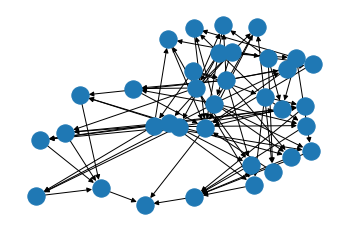

In [4]:
# Define the fuzzy rule base
rule1 = ctrl.Rule(strength['weak'] & gait['normal'] & cognition['normal'], fall_risk['medium'])
rule2 = ctrl.Rule(strength['weak'] & gait['normal'] & cognition['mild_impaired'], fall_risk['medium'])
rule3 = ctrl.Rule(strength['weak'] & gait['slighlty_imbalance'] & cognition['severe_impaired'], fall_risk['high'])
rule4 = ctrl.Rule(strength['weak'] & gait['slighlty_imbalance'] & cognition['mild_impaired'], fall_risk['high'])
rule5 = ctrl.Rule(strength['weak'] & gait['slighlty_imbalance'] & cognition['normal'], fall_risk['medium'])
rule6 = ctrl.Rule(strength['weak'] & gait['highly_imbalance'] , fall_risk['high'])
rule7 = ctrl.Rule(strength['moderate'] & gait['normal'] & cognition['normal'], fall_risk['low'])
rule8 = ctrl.Rule(strength['moderate'] & gait['normal'] & cognition['mild_impaired'], fall_risk['medium'])
rule9 = ctrl.Rule(strength['moderate'] & gait['slighlty_imbalance'] & cognition['severe_impaired'], fall_risk['high'])
rule10 = ctrl.Rule(strength['moderate'] & gait['slighlty_imbalance'] & cognition['mild_impaired'], fall_risk['high'])
rule11 = ctrl.Rule(strength['moderate'] & gait['slighlty_imbalance'] & cognition['normal'], fall_risk['medium'])
rule12 = ctrl.Rule(strength['moderate'] & gait['highly_imbalance'] & cognition['mild_impaired'], fall_risk['high'])
rule13 = ctrl.Rule(strength['moderate'] & gait['highly_imbalance'] & cognition['severe_impaired'], fall_risk['high'])
rule14 = ctrl.Rule(strength['strong'] & gait['normal'] & cognition['normal'], fall_risk['low'])
rule15 = ctrl.Rule(strength['strong'] & gait['normal'] & cognition['mild_impaired'], fall_risk['low'])
rule16 = ctrl.Rule(strength['strong'] & gait['slighlty_imbalance'] & cognition['severe_impaired'], fall_risk['medium'])
rule17 = ctrl.Rule(strength['strong'] & gait['slighlty_imbalance'] & cognition['normal'], fall_risk['low'])
rule18 = ctrl.Rule(strength['strong'] & gait['highly_imbalance'] & cognition['mild_impaired'], fall_risk['high'])
rule19 = ctrl.Rule(strength['strong'] & gait['highly_imbalance'] & cognition['severe_impaired'], fall_risk['high'])

# Combine to knowledge base system
rule_base = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12
                               ,rule13, rule14, rule15, rule16, rule17, rule18, rule19])

rule_base.view()


In [7]:
# Create the control system
fall_risk_ctrl = ctrl.ControlSystemSimulation(rule_base)

# Create function to return the fall risk calculated by the fuzzy system
def calculate_fall_risk(strength_val, gait_val, cognition_val):
    fall_risk_ctrl.input['Hand_Grip_Strength'] = strength_val
    fall_risk_ctrl.input['TUG'] = gait_val
    fall_risk_ctrl.input['Cognition_Score'] = cognition_val
    fall_risk_ctrl.compute()
    fall_risk.view(sim=fall_risk_ctrl)
    return fall_risk_ctrl.output['fall_risk']

C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\f

no 1:  1.4119058084772371
no 2:  1.3333333333333333
no 3:  3.524137931034483
no 4:  1.3333333333333333
no 5:  4.648036861506055
no 6:  3.524137931034483
no 7:  3.171187237048934


C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\f

no 8:  1.6888888888888889
no 9:  1.3722270938729624
no 10:  1.4818134863701578
no 11:  1.5555555555555556
no 12:  1.3333333333333333
no 13:  1.6888888888888889
no 14:  1.6333333333333335
no 15:  4.638888888888889
no 16:  8.38961038961039
no 17:  8.366666666666667
no 18:  8.538731824314196
no 19:  8.514285714285712
no 20:  4.628571428571429
no 21:  8.514285714285712
no 22:  8.192592592592593
no 23:  8.491533240353323
no 24:  5.427777777777776


C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\kamka\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


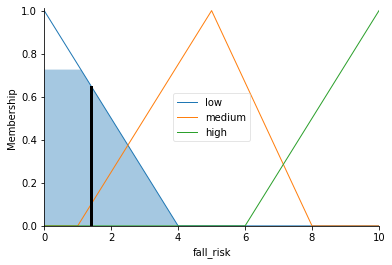

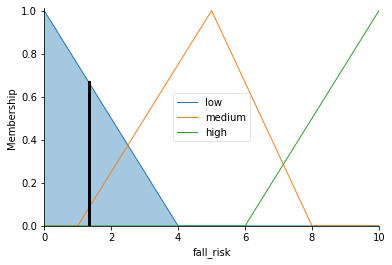

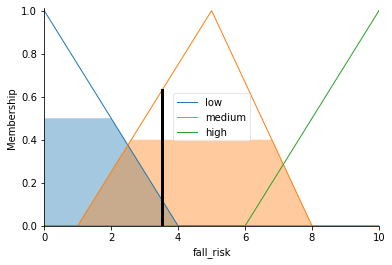

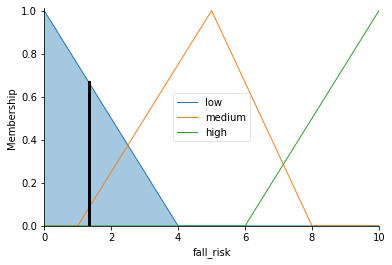

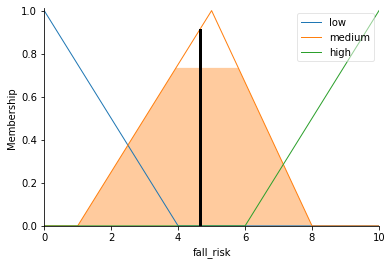

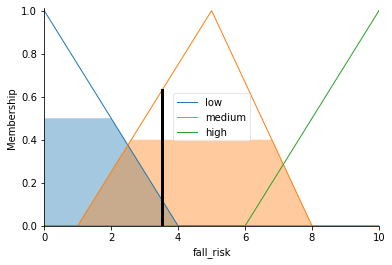

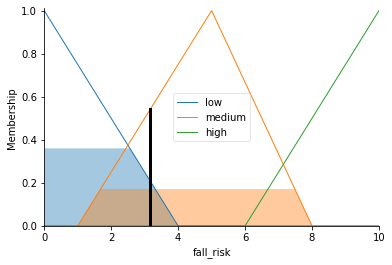

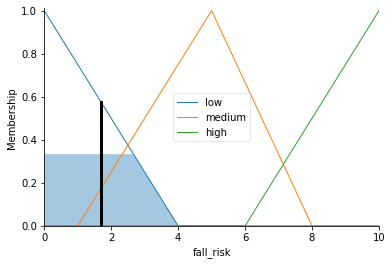

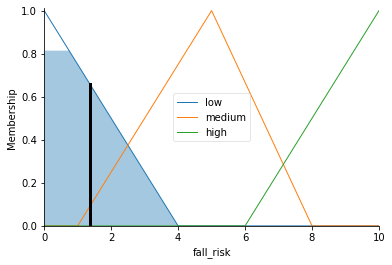

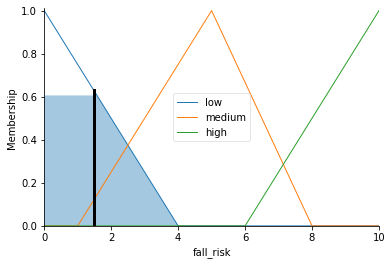

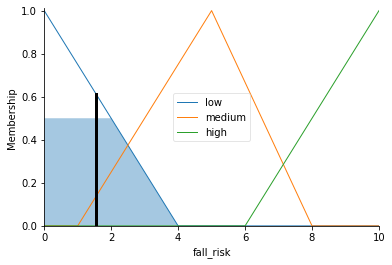

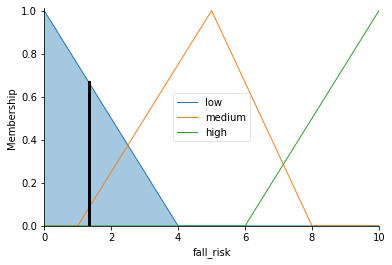

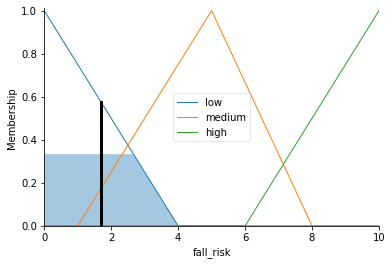

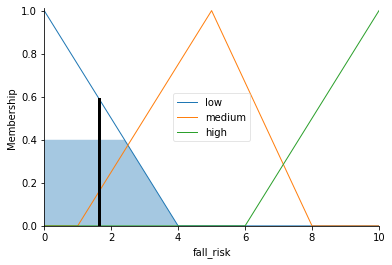

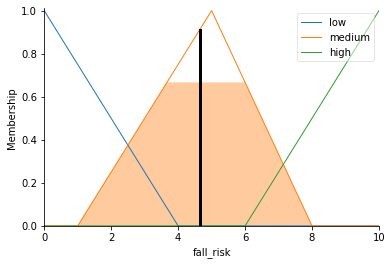

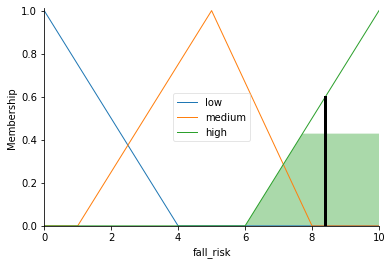

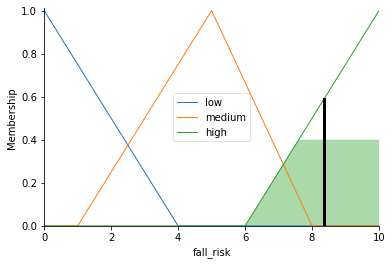

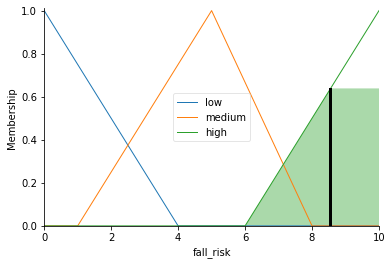

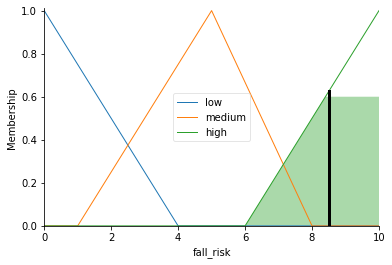

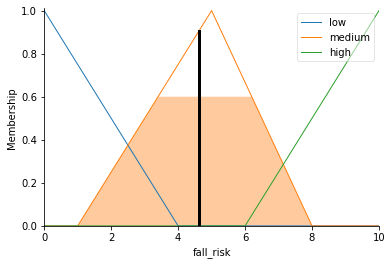

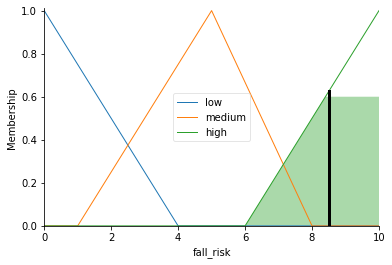

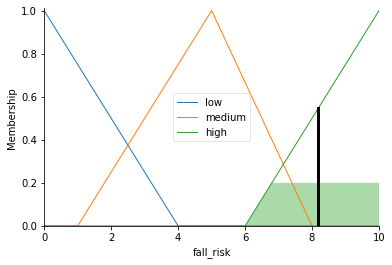

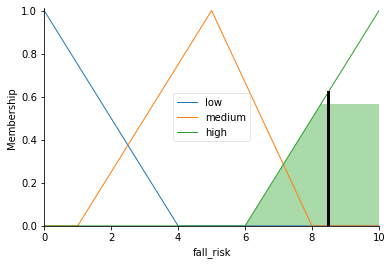

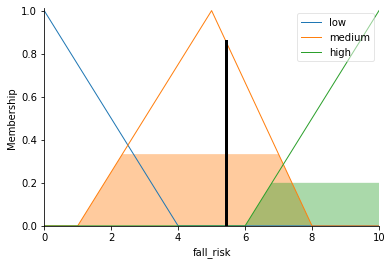

In [8]:
# Testing, calculate(Hand_Grip_Strength,TUG,Cognition_Score)
print("no 1: ",calculate_fall_risk(25.37,8,30))
print("no 2: ",calculate_fall_risk(34.23,11,28))
print("no 3: ",calculate_fall_risk(22.53,12,29))
print("no 4: ",calculate_fall_risk(34.60,8,27))
print("no 5: ",calculate_fall_risk(22.67,14,26))
print("no 6: ",calculate_fall_risk(21.80,12,27))
print("no 7: ",calculate_fall_risk(20.80,10,25))
print("no 8: ",calculate_fall_risk(31.10,11,24))
print("no 9: ",calculate_fall_risk(23.07,9,27))
print("no 10: ",calculate_fall_risk(22.03,9,25))
print("no 11: ",calculate_fall_risk(31.83,12,27))
print("no 12: ",calculate_fall_risk(39.80,10,29))
print("no 13: ",calculate_fall_risk(39.57,9,24))
print("no 14: ",calculate_fall_risk(37.40,8,23))
print("no 15: ",calculate_fall_risk(16.27,10,25))
print("no 16: ",calculate_fall_risk(19.00,14,14))
print("no 17: ",calculate_fall_risk(22.90,20,17))
print("no 18: ",calculate_fall_risk(17.53,22,24))
print("no 19: ",calculate_fall_risk(31.70,20,22))
print("no 20: ",calculate_fall_risk(35.80,17,9))
print("no 21: ",calculate_fall_risk(15.70,14,18))
print("no 22: ",calculate_fall_risk(15.30,13,16))
print("no 23: ",calculate_fall_risk(26.17,13,22))
print("no 24: ",calculate_fall_risk(14.23,11,24))